In [1]:
from numpy import *
import matplotlib . pyplot as plt
seterr(all='raise')


def runge_kutta_4_algorithm():
    global flag
    flag = False
    variables[0] = array([r0, rdot0, -theta0, -theta_dot0])
    for i in range(indices - 1):
        try:
            if ((theta0 == 0 and theta_dot0 == 0) or theta0 == math.pi) and i == 0:
                print('Warning : Unstable or stable equilibrium chosen as initial value. Results may be unintended.')
            if variables[i][0] <= (threshold * r0):
                print('The trajectory came within the threshold for identifying a singularity (%.4f%% of r0). The program has finished early (%.2 f s ) to avoid infinities.' % ((threshold * r0 * 100), (i * step)))
                break
            k1 = step * func(variables[i], times[i])
            k2 = step * func(variables[i] + k1 / 2, times[i] + step)
            k3 = step * func(variables[i] + k2 / 2, times[i] + step)
            k4 = step * func(variables[i] + k3, times[i] + step)

            variables[i + 1] = variables[i] + k1/6 + k2/3 + k3/3 + k4/6
        except FloatingPointError:
            flag = True
            print('Algorithm has exited early to avoid an erroneous data.')
            break




In [2]:
def func(coords, time):
    # This is the only unique aspect of this RK4 implementation
    radius = coords[0]
    radius_dot = 0
    theta = coords[2]
    theta_dot = coords[3]
    radius_dot_dot = 0
    theta_dot_dot = - (g / radius) * sin(theta)
    return array([radius_dot, radius_dot_dot, theta_dot, theta_dot_dot])

Calculation was successful.


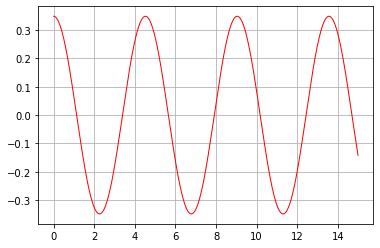

In [3]:
# Constants
step = 0.001
max_time = 15
threshold = 0.01
indices = int(max_time / step)
times = linspace(0, (indices - 1) * step, indices)

# Initialize the initial conditions
r0 = 5
rdot0 = 0
theta0 = -20 * math.pi / 180
theta_dot0 = 0
g = 9.8
mu = 4.162

# Runge-Kutta algorithm initialization variables
variables = zeros([indices, 4], dtype=float)

# Calculate
runge_kutta_4_algorithm()

# Begin plotting
plt.figure()
ax = plt.subplot(111)
ax.plot(times, variables[:, 2], color='r', linewidth=1)
ax.grid(True)
if not flag:
    print('Calculation was successful.')
    plt.show()
